# wordcloud

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'NanumGothic'

In [28]:
tmp = '강아지 산책 강아지 목욕 강아지 미용 강아지 쇼핑 친구와 저녁 먹음 가족과 점심 먹음 혼자 저녁 먹음 친구와 쇼핑'
print(tmp.count('강아지'))
print(tmp.count('산책'))

4
1


In [33]:
wc = WordCloud(font_path = 'C:\Windows\Fonts\HMKMRHD.TTF',
              background_color = 'black',
              width = 1000, height = 1000,
              max_words = 10,
              max_font_size = 300)

In [34]:
word_frq = wc.generate(tmp)

In [35]:
print(word_frq)
print(word_frq.words_)

{'강아지': 1.0, '먹음': 0.75, '쇼핑': 0.5, '친구와': 0.5, '저녁': 0.5, '산책': 0.25, '목욕': 0.25, '미용': 0.25, '가족과': 0.25, '점심': 0.25}


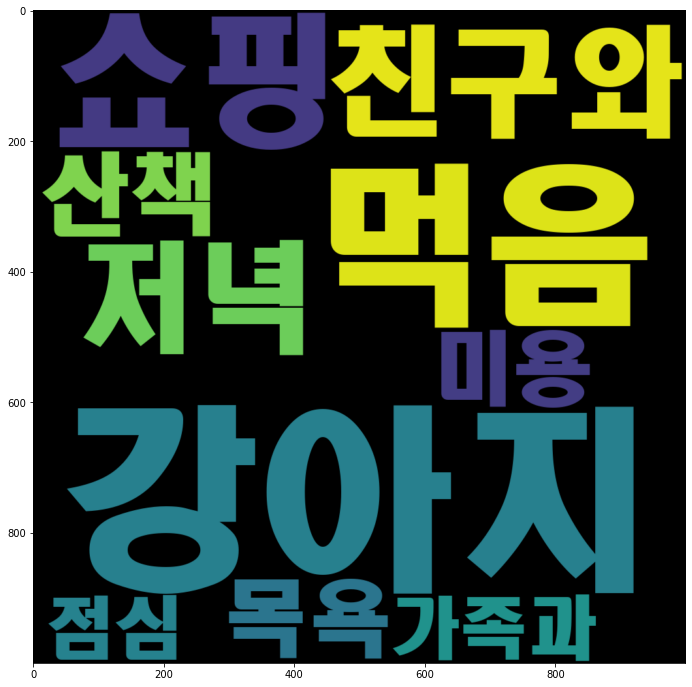

In [36]:
plt.figure(figsize = (12, 12))
plt.imshow(word_frq, interpolation = 'bilinear')
plt.show()

# 대통령 신년사 wordcloud

In [38]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'

In [41]:
with open('./py_data/2021_대통령_신년사.txt', 'r', encoding = 'utf-8') as f:
    txt = f.read()

txt[:100]

'존경하는 국민 여러분,\n\n신축년 새해를 맞았습니다.\n\n희망을 기원하면서도 마음이 무겁습니다.\n새해가 새해 같지 않다는 말이 실감납니다.\n\n코로나와의 기나긴 전쟁이 끝나지 않았습니다'

In [42]:
with open('./py_data/2021_대통령_신년사.txt', 'r', encoding = 'utf-8') as f:
    txt2 = f.readlines()

txt2[:10]

['존경하는 국민 여러분,\n',
 '\n',
 '신축년 새해를 맞았습니다.\n',
 '\n',
 '희망을 기원하면서도 마음이 무겁습니다.\n',
 '새해가 새해 같지 않다는 말이 실감납니다.\n',
 '\n',
 '코로나와의 기나긴 전쟁이 끝나지 않았습니다.\n',
 '\n',
 '생명과 안전이 여전히 위협받고, 유례없는 민생경제의 어려움이 지속되고 있습니다.\n']

In [56]:
wc = WordCloud(font_path = 'C:\Windows\Fonts\HMKMRHD.TTF',
              background_color = 'black',
              width = 1000, height = 1000,
              max_words = 200,
              max_font_size = 300)

word_frq = wc.generate(txt)

print(word_frq)
print(word_frq.words_)

{'우리': 1.0, '것입니다': 0.875, '수': 0.875, '있습니다': 0.7083333333333334, '함께': 0.625, '우리는': 0.5416666666666666, '수 있도록': 0.4583333333333333, '지난해': 0.4166666666666667, '한': 0.3333333333333333, '을': 0.3333333333333333, '있는': 0.3333333333333333, '정부는': 0.3333333333333333, '등': 0.3333333333333333, '더욱': 0.3333333333333333, '세계': 0.2916666666666667, '되었습니다': 0.2916666666666667, '코로나': 0.2916666666666667, '위해': 0.2916666666666667, '의': 0.2916666666666667, '국민 여러분': 0.2916666666666667, '전': 0.25, '것이': 0.25, '비롯한': 0.25, '위한': 0.25, '뉴딜': 0.25, '방역': 0.20833333333333334, '상생': 0.20833333333333334, '모두': 0.20833333333333334, '강한': 0.20833333333333334, '새로운': 0.20833333333333334, '더': 0.20833333333333334, '우리의': 0.20833333333333334, '될 것입니다': 0.20833333333333334, '한국판 뉴딜': 0.20833333333333334, '또한': 0.16666666666666666, '경제': 0.16666666666666666, '국민들은': 0.16666666666666666, '위기': 0.16666666666666666, '대한민국은': 0.16666666666666666, '같은': 0.16666666666666666, '국민들의': 0.16666666666666666, '가장': 0.1666

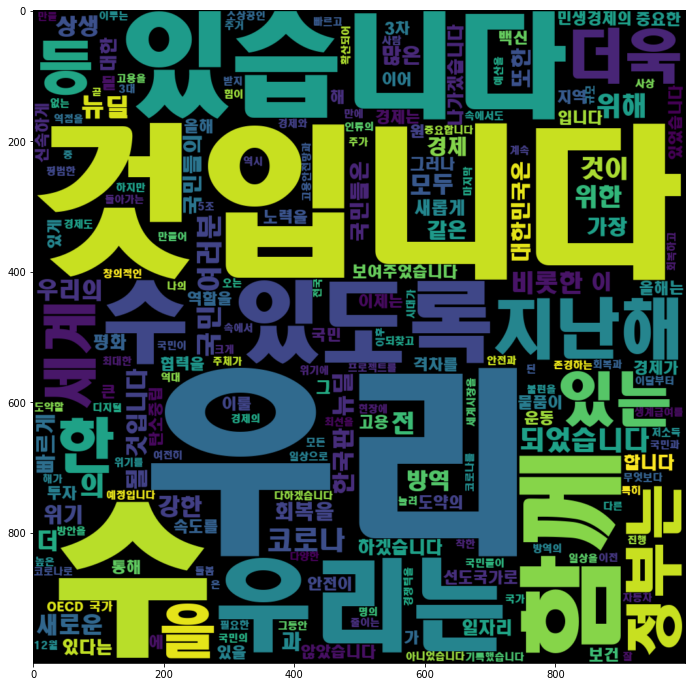

In [57]:
plt.figure(figsize = (12, 12))
plt.imshow(word_frq, interpolation = 'bilinear')
plt.show()

# 대통령 신년사 wordcloud - 명사 추출

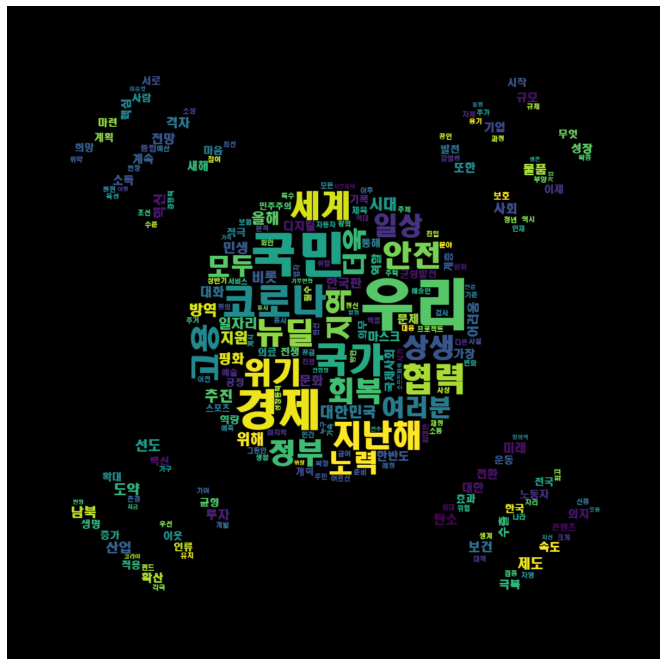

In [146]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from konlpy.tag import Okt
from collections import Counter
import numpy as np
from PIL import Image

okt = Okt()

with open('./py_data/2021_대통령_신년사.txt', 'r', encoding = 'utf-8') as f:
    txt = f.read()
    
img_path='./py_data/태극기.png'
cloud_mask = np.array(Image.open(img_path))
    
ls_nouns = okt.nouns(txt)
cnt = Counter(ls_nouns)
cnt_sorted = cnt.most_common()  # 내림차순 정렬

ls_cnt = []
for word, cnt in cnt_sorted:
    if (cnt > 1) & (len(word) > 1):
        ls_cnt.append((word, cnt))

dict_cnt = dict(ls_cnt)

wordcloud = WordCloud(font_path = 'C:\Windows\Fonts\HMKMRHD.TTF',
            background_color = 'black',
            width = 1000, height = 1000,
            max_words = 500,
            max_font_size = 100,
            mask=cloud_mask)

wc = wordcloud.generate_from_frequencies(dict_cnt)
plt.figure(figsize = (12, 12))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis("off")
plt.show()